In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1.head()
#studio vs profit? 
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
#print(df1['studio'].value_counts()['BV'])
#NOT SURE OF HOW TO TURN STUDIO INTO THIR FULL NAME


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [184]:
df_studio = df1.groupby('studio').filter(lambda x : len(x)>=20)
#removing studios entries with less than 20 films

df_studio = df_studio.drop(columns=['domestic_gross', 'foreign_gross', 'year'])
#removing unneccecary columns

df_studio.head()


,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
6,Iron Man 2,Par.


In [185]:
df2 = pd.read_csv('tn.movie_budgets.csv.gz')

columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in columns_to_convert:
    df2[column] = pd.to_numeric(df2[column].replace('[\$,]', '', regex=True), errors='coerce').astype(np.int64)
#above code changes budget and gross columns to integers

df2['profit'] = df2.worldwide_gross - df2.production_budget
#adding a profit column by combining worldwide gross and production budget. focusing on worldwide rather than domestic, 
#assuming microsoft are going for worldwide audiance 
#I'm not sure if all costs have been factored in,eg advertising. More research required


df2.sort_values(by='profit', ascending =False).head()
#can be merged to combine profit with other metrics

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [186]:
df_profit = df2.drop(columns=['id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'])
df_profit.head()
#unneccecary columns removed to simplify merge 

,movie,profit
0,Avatar,2351345279
1,Pirates of the Caribbean: On Stranger Tides,635063875
2,Dark Phoenix,-200237650
3,Avengers: Age of Ultron,1072413963
4,Star Wars Ep. VIII: The Last Jedi,999721747


In [187]:
merged_df = pd.merge(df_studio, df_profit, left_on='title', right_on='movie', how='inner')
#merging data from studio and profit data frames

merged_df = merged_df.drop(columns=['movie','title'])
#movie titles not needed

df_final = merged_df.groupby('studio', as_index =False).mean()
#grouping studio releases together, then finding the average

df_final = df_final.sort_values(by='profit', ascending=False)
#sorting by profit in decending order

print(df_final)

     studio        profit
2        BV  3.310447e+08
32     Uni.  1.771931e+08
9       Fox  1.730938e+08
34  WB (NL)  1.727639e+08
28     Sony  1.696123e+08
33       WB  1.372168e+08
21     Par.  1.306514e+08
29   Strand  1.292782e+08
31      UTV  9.501160e+07
16     MBox  8.103616e+07
15      LGF  8.055740e+07
14     LG/S  6.959919e+07
25     SGem  6.687388e+07
30     TriS  6.370211e+07
35    Wein.  4.834126e+07
27      STX  4.324319e+07
7      Eros  4.225397e+07
3        CJ  3.649653e+07
8     Focus  3.605226e+07
10     FoxS  3.581295e+07
24    Rela.  2.801267e+07
19      ORF  1.781508e+07
26      SPC  1.423107e+07
0       A24  1.223359e+07
6      EOne  9.099122e+06
23     RTWC  7.531536e+06
1       BST  5.855878e+06
13      IFC  5.272377e+06
22    RAtt.  4.509280e+06
20    Osci.  1.867294e+06
4     Cohen  8.673900e+05
5     Drft. -9.795265e+05
12    Gold. -3.701818e+06
11       GK -4.417203e+06
18    Magn. -4.504840e+06
17      MNE -6.695963e+06


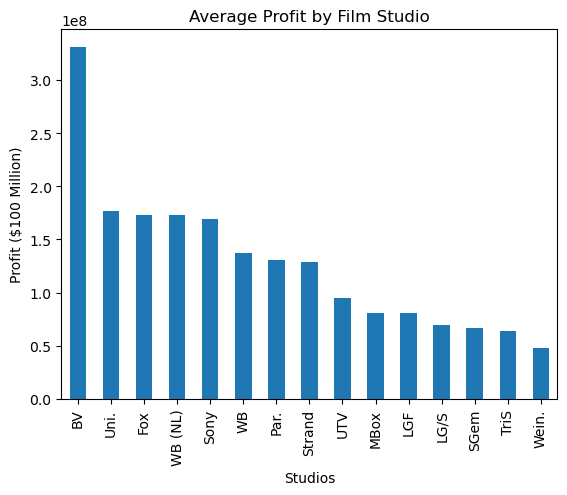

In [188]:
df_top15 = df_final.head(15)
#picking the 15 most profitable studios to highlight in bar chart

df_top15.plot(x='studio', y='profit', kind='bar', legend=False)
plt.title('Average Profit by Film Studio')
plt.xlabel('Studios')
plt.ylabel('Profit ($100 Million)')
plt.show()

In [48]:
df3 = pd.read_csv('tmdb.movies.csv.gz')
df3.head()
#genres and ratings look worth exploring 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [81]:
df4 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
df4.head()
#1559 rows
#director, genre, writer, runtime and studio look like interesting columns to explore. 
#WHAT TO INDEX TO JOIN? ID FROM DF3 PERHAPS? 
#studio has only 494 non null values. 31 percent
#print(df4['studio'].value_counts())

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [66]:
df5 = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
df5.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [75]:
df6 = pd.read_csv('im.db.zip', encoding='latin-1')
#I CANNOT GET THIS FILE TO OPEN 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2
